In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, random
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

## Specify the model and load weights for inference

In [2]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
yaml_cityscapes = "Cityscapes/mask_rcnn_R_50_FPN.yaml"
yaml_coco = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
yaml_path = yaml_cityscapes

cfg.merge_from_file(model_zoo.get_config_file(yaml_path))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(yaml_path)
predictor = DefaultPredictor(cfg)

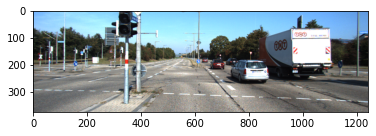

In [3]:
%matplotlib inline
image_path = "/storage/remote/atcremers40/motion_seg/datasets/Extended_MOD_Masks/images/2011_09_26_drive_0018_sync/data/0000000083.png"
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [4]:
outputs = predictor(im)
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
print(outputs["instances"].pred_masks.shape)
print(im.shape)

/storage/remote/atcremers62/w0017/miniconda3/envs/detectron2/lib/python3.7/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


tensor([2, 2, 2, 2, 2, 3, 4, 2], device='cuda:0')
Boxes(tensor([[ 732.4070,  180.0638,  874.1520,  269.7236],
        [ 715.0738,  176.5656,  761.4069,  204.0698],
        [ 656.8815,  180.0727,  710.3390,  218.8341],
        [ 627.6510,  174.8206,  648.5248,  193.5278],
        [1093.5945,  192.9615, 1117.1323,  216.2226],
        [ 839.4747,   61.5874, 1103.9606,  250.9602],
        [ 539.4844,  156.9693,  617.3624,  178.8554],
        [ 704.6162,  187.2487,  718.5709,  201.7271]], device='cuda:0'))
torch.Size([8, 375, 1242])
(375, 1242, 3)


/storage/remote/atcremers62/w0017/miniconda3/envs/detectron2/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180594101/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(375, 1242, 3) <class 'numpy.ndarray'>


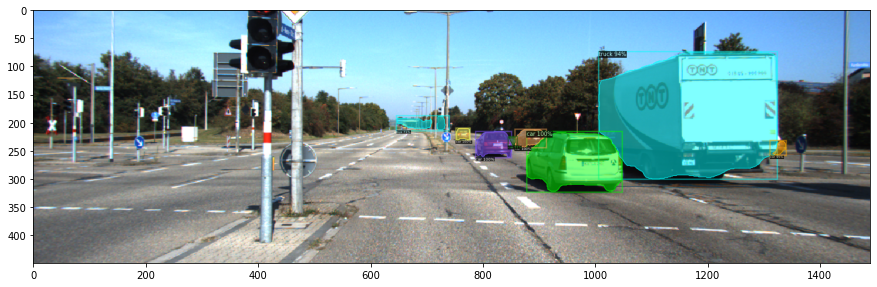

In [5]:
# We can use `Visualizer` to draw the predictions on the image.
print(im.shape, type(im))
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(15,7))
plt.imshow(out.get_image()[:, :, ::-1])